# P9
---
## Par **Valentin MONTEIRO**
---

## Import

> Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pack scikit

from sklearn.ensemble import IsolationForest
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

> Import DATA

In [46]:
df = pd.read_csv("/content/drive/MyDrive/DATA/P9/joined_data_p9.csv", delimiter=";", index_col="Zone")
df.rename(columns ={"Prix export $/tonnes":"Prix export $ par tonnes"}, inplace=True)
df = df.replace(np.nan, 0)

In [47]:
df

Prix export $ par tonnes  Population  \
Zone                                                                           
Afghanistan                                          1024.590164    36296113   
Afrique du Sud                                          0.000000    57009756   
Albanie                                              1333.333333     2884169   
Algérie                                                 0.000000    41389189   
Allemagne                                            3359.989429    82658409   
...                                                          ...         ...   
Venezuela (République bolivarienne du)                  0.000000    29402484   
Viet Nam                                              854.409318    94600648   
Yémen                                                1409.023512    27834819   
Zambie                                                  0.000000    16853599   
Zimbabwe                                                0.000000    14236595   

                                        Production (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                        28.0   
Afrique du Sud                                                   1667.0   
Albanie                                                            13.0   
Algérie                                                           275.0   
Allemagne                                                        1514.0   
...                                                                 ...   
Venezuela (République bolivarienne du)                            600.0   
Viet Nam                                                          918.0   
Yémen                                                             168.0   
Zambie                                                             49.0   
Zimbabwe                                                           69.0   

                                        Nourriture (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                        55.0   
Afrique du Sud                                                   2035.0   
Albanie                                                            47.0   
Algérie                                                           264.0   
Allemagne                                                        1609.0   
...                                                                 ...   
Venezuela (République bolivarienne du)                            596.0   
Viet Nam                                                         1166.0   
Yémen                                                             237.0   
Zambie                                                             58.0   
Zimbabwe                                                           67.0   

                                        Disponibilité de matière grasse en quantité   \
Zone                                                                                   
Afghanistan                                                                     0.33   
Afrique du Sud                                                                  9.25   
Albanie                                                                         6.45   
Algérie                                                                         1.50   
Allemagne                                                                       4.16   
...                                                                              ...   
Venezuela (République bolivarienne du)                                          4.39   
Viet Nam                                                                        3.40   
Yémen                                                                           1.85   
Zambie                                                                         


## DATA Prep

> Ejection des outliers

In [48]:
# J'utilise l'IsolationForest pour mettre en évidence mes outliers
X = df.values
model = IsolationForest(contamination=0.025)
model.fit(X)
outliers = model.predict(X)

In [49]:
# Jointure df ➡️ outliers
outliers = pd.DataFrame(outliers)
outliers = outliers.rename(columns={0:"outliers"})
df = df.reset_index()
df = pd.merge(df,outliers,left_index=True,right_index=True)
df = df.set_index("Zone")

In [50]:
df

Prix export $ par tonnes  Population  \
Zone                                                                           
Afghanistan                                          1024.590164    36296113   
Afrique du Sud                                          0.000000    57009756   
Albanie                                              1333.333333     2884169   
Algérie                                                 0.000000    41389189   
Allemagne                                            3359.989429    82658409   
...                                                          ...         ...   
Venezuela (République bolivarienne du)                  0.000000    29402484   
Viet Nam                                              854.409318    94600648   
Yémen                                                1409.023512    27834819   
Zambie                                                  0.000000    16853599   
Zimbabwe                                                0.000000    14236595   

                                        Production (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                        28.0   
Afrique du Sud                                                   1667.0   
Albanie                                                            13.0   
Algérie                                                           275.0   
Allemagne                                                        1514.0   
...                                                                 ...   
Venezuela (République bolivarienne du)                            600.0   
Viet Nam                                                          918.0   
Yémen                                                             168.0   
Zambie                                                             49.0   
Zimbabwe                                                           69.0   

                                        Nourriture (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                        55.0   
Afrique du Sud                                                   2035.0   
Albanie                                                            47.0   
Algérie                                                           264.0   
Allemagne                                                        1609.0   
...                                                                 ...   
Venezuela (République bolivarienne du)                            596.0   
Viet Nam                                                         1166.0   
Yémen                                                             237.0   
Zambie                                                             58.0   
Zimbabwe                                                           67.0   

                                        Disponibilité de matière grasse en quantité   \
Zone                                                                                   
Afghanistan                                                                     0.33   
Afrique du Sud                                                                  9.25   
Albanie                                                                         6.45   
Algérie                                                                         1.50   
Allemagne                                                                       4.16   
...                                                                              ...   
Venezuela (République bolivarienne du)                                          4.39   
Viet Nam                                                                        3.40   
Yémen                                                                           1.85   
Zambie                                                                         

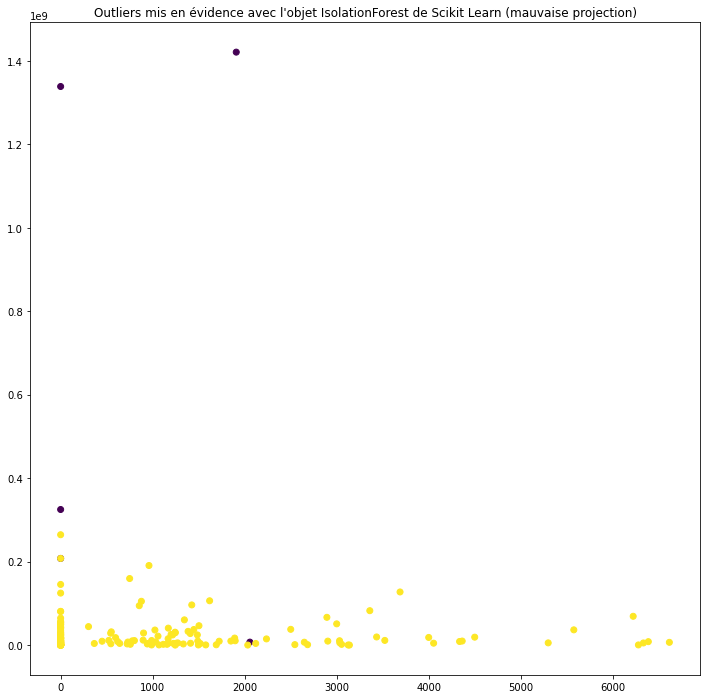

In [51]:
plt.figure(figsize=(12,12))
plt.title("Outliers mis en évidence avec l'objet IsolationForest de Scikit Learn (mauvaise projection)")
plt.scatter(X[:,0],X[:,1],c=model.predict(X))
plt.savefig("1.png")

In [53]:
# Liste des Outliers
df_out = df[df["outliers"]==-1]
df_out.to_csv("df_out.csv")

In [54]:
# Exclusion des outliers
df = df[df.outliers==1]
df.drop("outliers", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
df

Prix export $ par tonnes  Population  \
Zone                                                                           
Afghanistan                                          1024.590164    36296113   
Afrique du Sud                                          0.000000    57009756   
Albanie                                              1333.333333     2884169   
Algérie                                                 0.000000    41389189   
Allemagne                                            3359.989429    82658409   
...                                                          ...         ...   
Venezuela (République bolivarienne du)                  0.000000    29402484   
Viet Nam                                              854.409318    94600648   
Yémen                                                1409.023512    27834819   
Zambie                                                  0.000000    16853599   
Zimbabwe                                                0.000000    14236595   

                                        Production (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                        28.0   
Afrique du Sud                                                   1667.0   
Albanie                                                            13.0   
Algérie                                                           275.0   
Allemagne                                                        1514.0   
...                                                                 ...   
Venezuela (République bolivarienne du)                            600.0   
Viet Nam                                                          918.0   
Yémen                                                             168.0   
Zambie                                                             49.0   
Zimbabwe                                                           69.0   

                                        Nourriture (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                        55.0   
Afrique du Sud                                                   2035.0   
Albanie                                                            47.0   
Algérie                                                           264.0   
Allemagne                                                        1609.0   
...                                                                 ...   
Venezuela (République bolivarienne du)                            596.0   
Viet Nam                                                         1166.0   
Yémen                                                             237.0   
Zambie                                                             58.0   
Zimbabwe                                                           67.0   

                                        Disponibilité de matière grasse en quantité   \
Zone                                                                                   
Afghanistan                                                                     0.33   
Afrique du Sud                                                                  9.25   
Albanie                                                                         6.45   
Algérie                                                                         1.50   
Allemagne                                                                       4.16   
...                                                                              ...   
Venezuela (République bolivarienne du)                                          4.39   
Viet Nam                                                                        3.40   
Yémen                                                                           1.85   
Zambie                                                                         

> ACP

In [11]:
X = df.values
name = df.index
variable = df.columns

In [12]:
# Standardisation des données
stdscl = preprocessing.StandardScaler().fit(X)
X_scaled = stdscl.transform(X)

In [13]:
# Analyse en composante principale avec un object PCA à ncluster max (20)
pca = decomposition.PCA()
pca.fit(X_scaled)

PCA()

In [14]:
variance = pd.DataFrame({"Variable": variable,
                         "Variance Expliqué": pca.explained_variance_,
                         "% Variance Expliqué": pca.explained_variance_ratio_*100,
                         "% Variance Expliqué Cumulée": np.cumsum(pca.explained_variance_ratio_)*100
                        })

In [15]:
variance.set_index("Variable", inplace=True)
variance

Variance Expliqué  \
Variable                                                                
Prix export $ par tonnes                                 5.067052e+00   
Population                                               3.872443e+00   
Production (Milliers de tonnes)                          2.134976e+00   
Nourriture (Milliers de tonnes)                          1.415462e+00   
Disponibilité de matière grasse en quantité              1.208241e+00   
Autres utilisations (non alimentaire) (Milliers...       1.045303e+00   
Importations - Quantité (Milliers de tonnes)             8.919035e-01   
Résidus (Milliers de tonnes)                             6.788387e-01   
Aliments pour animaux (Milliers de tonnes)               6.183689e-01   
Alimentation pour touristes (Milliers de tonnes)         5.507340e-01   
Semences (Milliers de tonnes)                            2.753919e-01   
Disponibilité alimentaire en quantité (kg/perso...       1.652785e-01   
Pertes (Milliers de tonnes)                              1.097474e-01   
Disponibilité intérieure (Milliers de tonnes)            6.794238e-02   
Exportations - Quantité (Milliers de tonnes)             6.730186e-03   
Variation de stock (Milliers de tonnes)                  2.170280e-05   
Traitement (Milliers de tonnes)                          4.229438e-07   
Disponibilité de protéines en quantité                   1.584329e-07   
Disponibilité alimentaire (Kcal/personne/jour)           4.423562e-33   
Production USD$/tonne                                    1.763512e-35   

                                                    % Variance Expliqué  \
Variable                                                                  
Prix export $ par tonnes                                   2.798173e+01   
Population                                                 2.138475e+01   
Production (Milliers de tonnes)                            1.178995e+01   
Nourriture (Milliers de tonnes)                            7.816588e+00   
Disponibilité de matière grasse en quantité                6.672254e+00   
Autres utilisations (non alimentaire) (Milliers...         5.772465e+00   
Importations - Quantité (Milliers de tonnes)               4.925349e+00   
Résidus (Milliers de tonnes)                               3.748743e+00   
Aliments pour animaux (Milliers de tonnes)                 3.414812e+00   
Alimentation pour touristes (Milliers de tonnes)           3.041312e+00   
Semences (Milliers de tonnes)                              1.520793e+00   
Disponibilité alimentaire en quantité (kg/perso...         9.127153e-01   
Pertes (Milliers de tonnes)                                6.060567e-01   
Disponibilité intérieure (Milliers de tonnes)              3.751974e-01   
Exportations - Quantité (Milliers de tonnes)               3.716603e-02   
Variation de stock (Milliers de tonnes)                    1.198492e-04   
Traitement (Milliers de tonnes)                            2.335618e-06   
Disponibilité de protéines en quantité                     8.749122e-07   
Disponibilité alimentaire (Kcal/personne/jour)             2.442818e-32   
Production USD$/tonne                                      9.738622e-35   

                                                    % Variance Expliqué Cumulée  
Variable                                                                         
Prix export $ par tonnes                                              27.981726  
Population                                                            49.366473  
Production (Milliers de tonnes)                                       61.156425  
Nourriture (Milliers de tonnes)                                       68.973013  
Disponibilité de matière grasse en quantité                           75.645267  
Autres utilisations (non alimentaire) (Milliers...                    81.417732  
Importations - Quantité (Milliers de tonnes)                          86.343081  
Résidus (Milliers de tonnes)                            

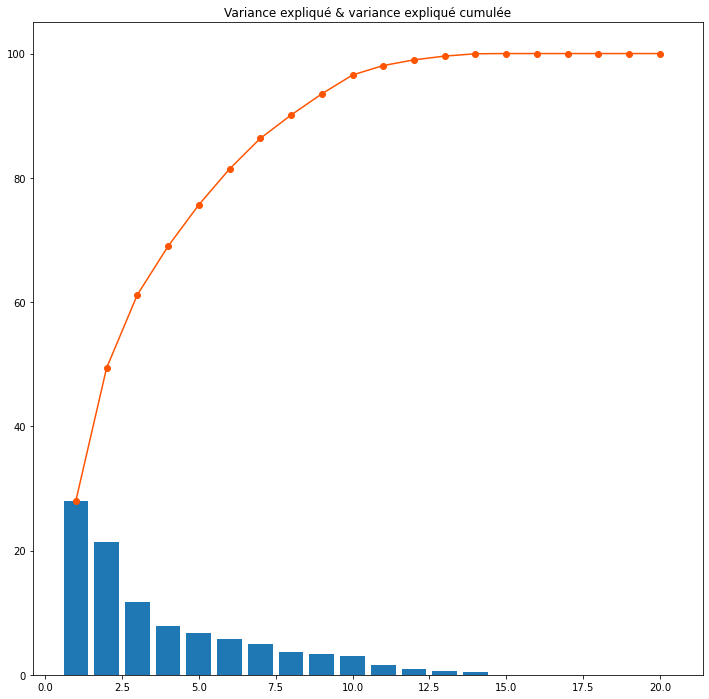

In [16]:
plt.figure(figsize= [12,12])
plt.title("Variance expliqué & variance expliqué cumulée")
plt.bar(np.arange(len(variance["% Variance Expliqué"]))+1, variance["% Variance Expliqué"])
plt.plot(np.arange(len(variance["% Variance Expliqué Cumulée"]))+1, variance["% Variance Expliqué Cumulée"], c="#FF5400", marker="o")
plt.savefig("3.png")

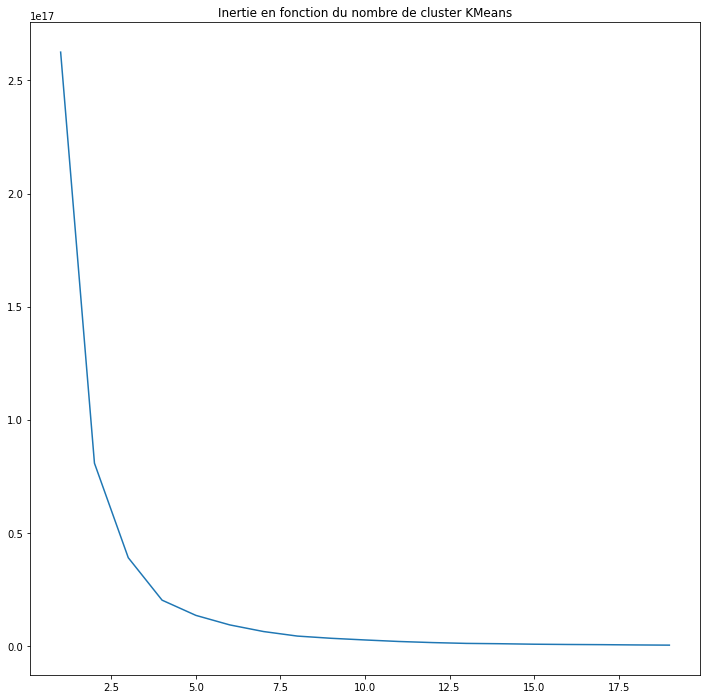

In [17]:
# Mon graphique à plus de coude que de bras, je vais donc accentué la cassure 
inertia = []
K_range = range(1,20)
for k in K_range:
  model = KMeans(n_clusters=k).fit(X)
  inertia.append(model.inertia_)
plt.figure(figsize=(12,12))
plt.title("Inertie en fonction du nombre de cluster KMeans")
plt.plot(K_range,inertia)
plt.savefig("4.png")

In [18]:
# Je garde seulement 10 variables
spr = variance[variance["% Variance Expliqué Cumulée"]>98]
df = df.drop(spr.index, axis=1)
variance = variance.drop(spr.index, axis=0)
df

Prix export $ par tonnes  Population  \
Zone                                                                           
Afghanistan                                          1024.590164    36296113   
Afrique du Sud                                          0.000000    57009756   
Albanie                                              1333.333333     2884169   
Algérie                                                 0.000000    41389189   
Allemagne                                            3359.989429    82658409   
...                                                          ...         ...   
Venezuela (République bolivarienne du)                  0.000000    29402484   
Viet Nam                                              854.409318    94600648   
Yémen                                                1409.023512    27834819   
Zambie                                                  0.000000    16853599   
Zimbabwe                                                0.000000    14236595   

                                        Production (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                        28.0   
Afrique du Sud                                                   1667.0   
Albanie                                                            13.0   
Algérie                                                           275.0   
Allemagne                                                        1514.0   
...                                                                 ...   
Venezuela (République bolivarienne du)                            600.0   
Viet Nam                                                          918.0   
Yémen                                                             168.0   
Zambie                                                             49.0   
Zimbabwe                                                           69.0   

                                        Nourriture (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                        55.0   
Afrique du Sud                                                   2035.0   
Albanie                                                            47.0   
Algérie                                                           264.0   
Allemagne                                                        1609.0   
...                                                                 ...   
Venezuela (République bolivarienne du)                            596.0   
Viet Nam                                                         1166.0   
Yémen                                                             237.0   
Zambie                                                             58.0   
Zimbabwe                                                           67.0   

                                        Disponibilité de matière grasse en quantité   \
Zone                                                                                   
Afghanistan                                                                     0.33   
Afrique du Sud                                                                  9.25   
Albanie                                                                         6.45   
Algérie                                                                         1.50   
Allemagne                                                                       4.16   
...                                                                              ...   
Venezuela (République bolivarienne du)                                          4.39   
Viet Nam                                                                        3.40   
Yémen                                                                           1.85   
Zambie                                                                         

In [19]:
# Analyse en composante principale avec un object PCA à ncluster 4
n_comp = 4
pca= decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

In [20]:
 # Fonction qui me permet d'afficher mes cercles de corrélations

# ---------- PROVIENT DU COURS D'OPENCLASSROOMS
# https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(12,12))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.savefig("5 Cercle des corrélations (F{} et F{}).png".format(d1+1, d2+1))
            plt.show(block=False)

# Fonction qui me permet d'afficher mes projection sur des plans factorielle            

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,12))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.savefig("6 Projection des individus (sur F{} et F{}).png".format(d1+1, d2+1))
            plt.show(block=False)

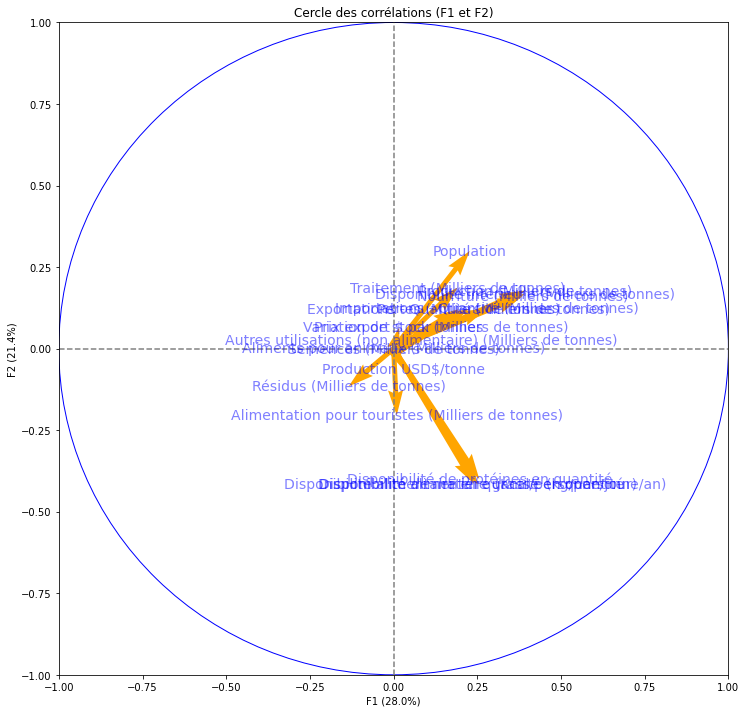

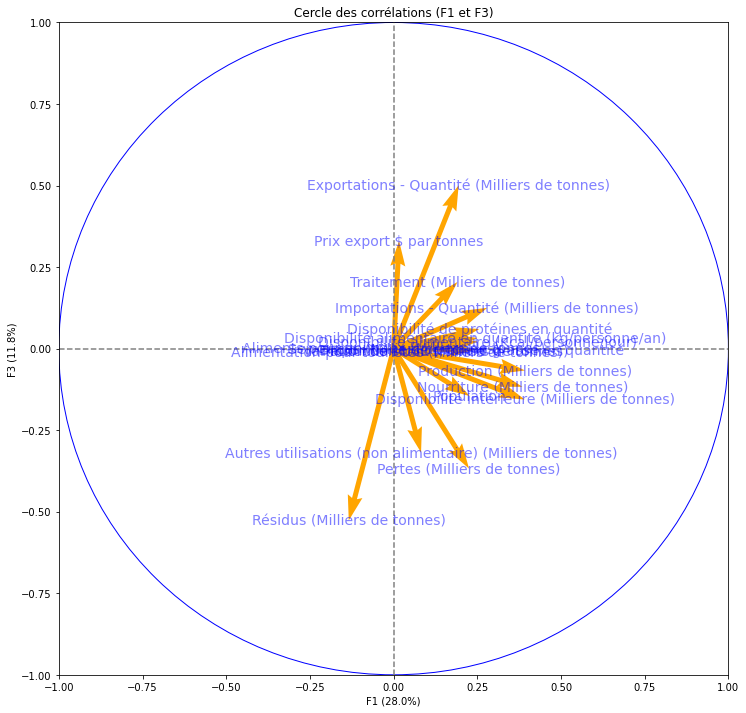

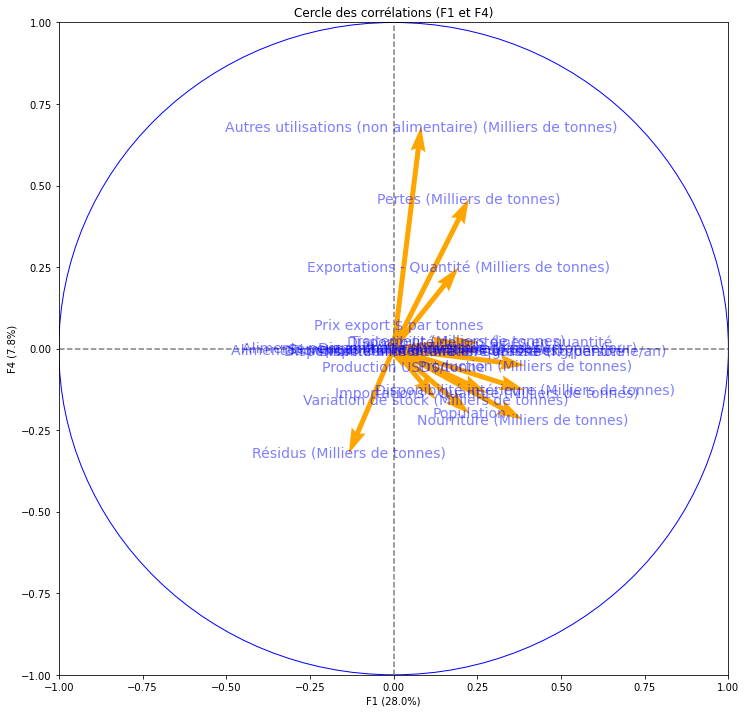

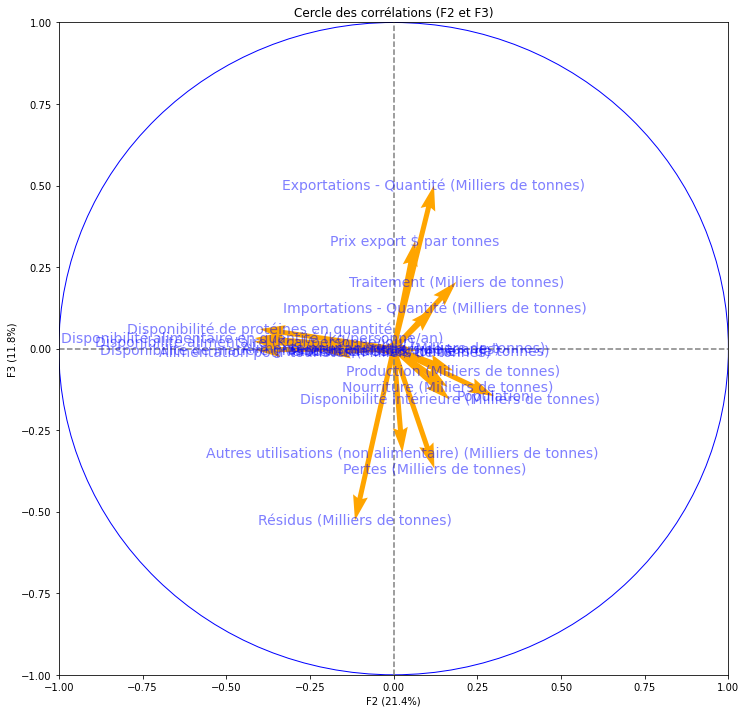

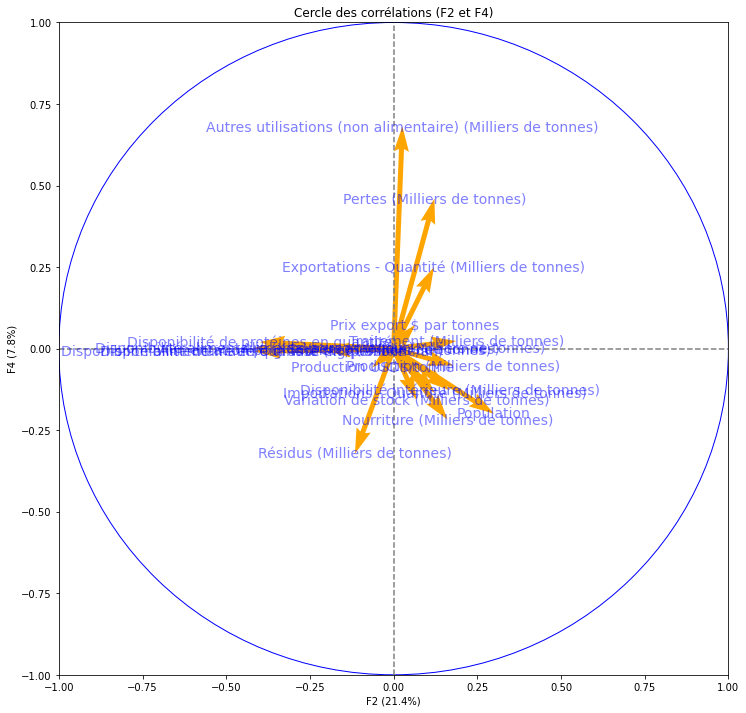

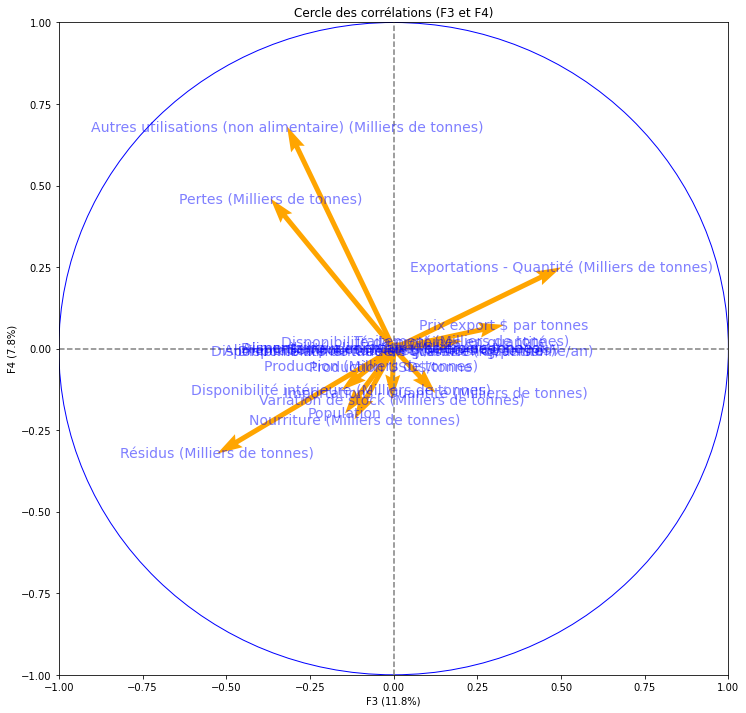

In [21]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)], labels= np.array(variable))

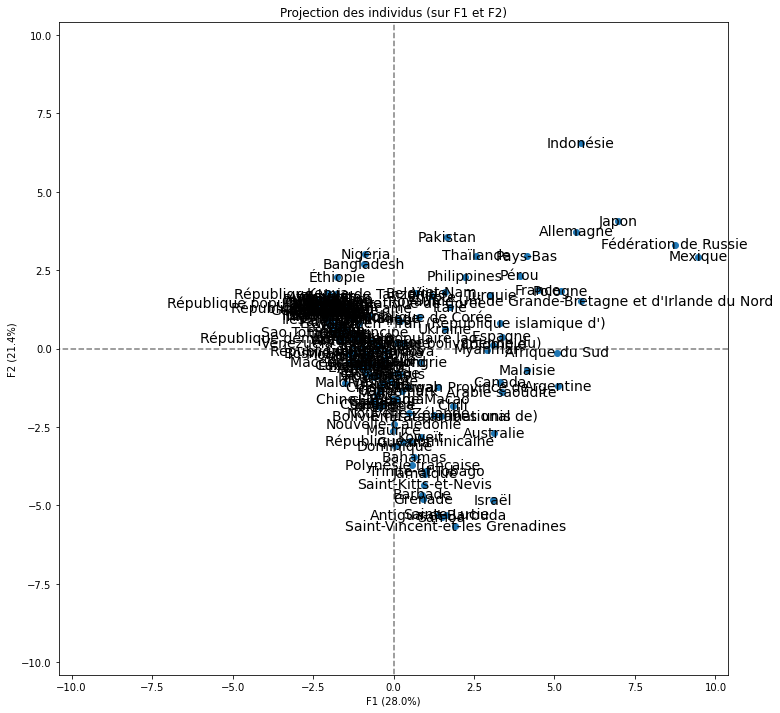

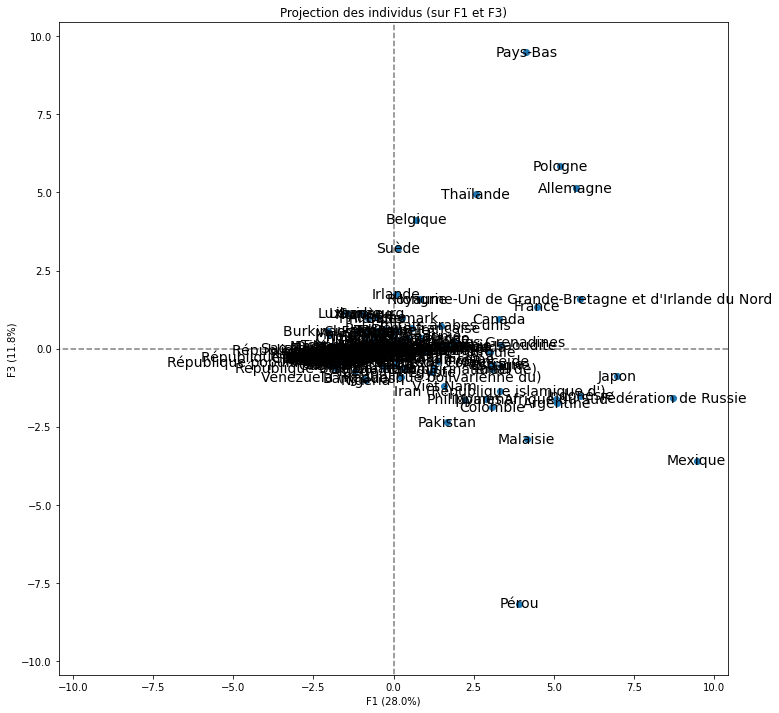

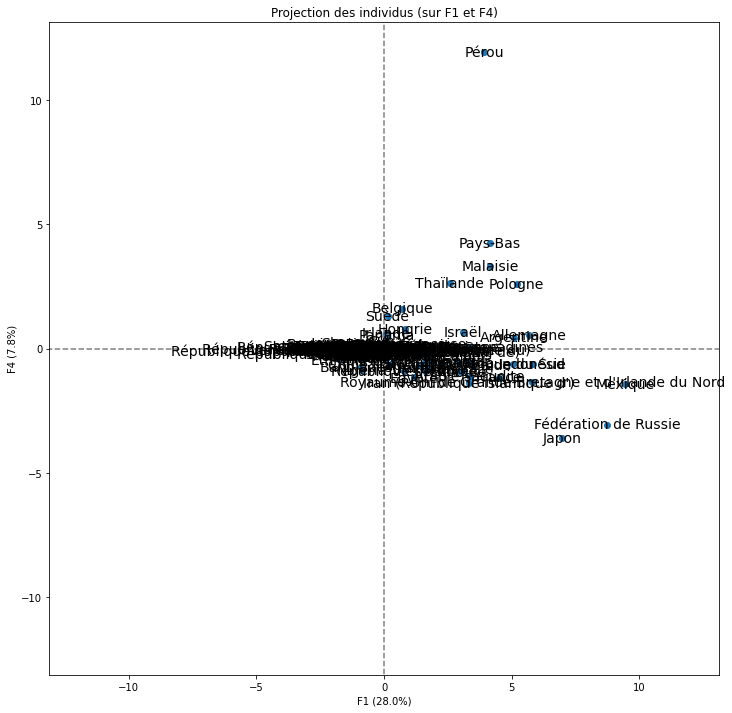

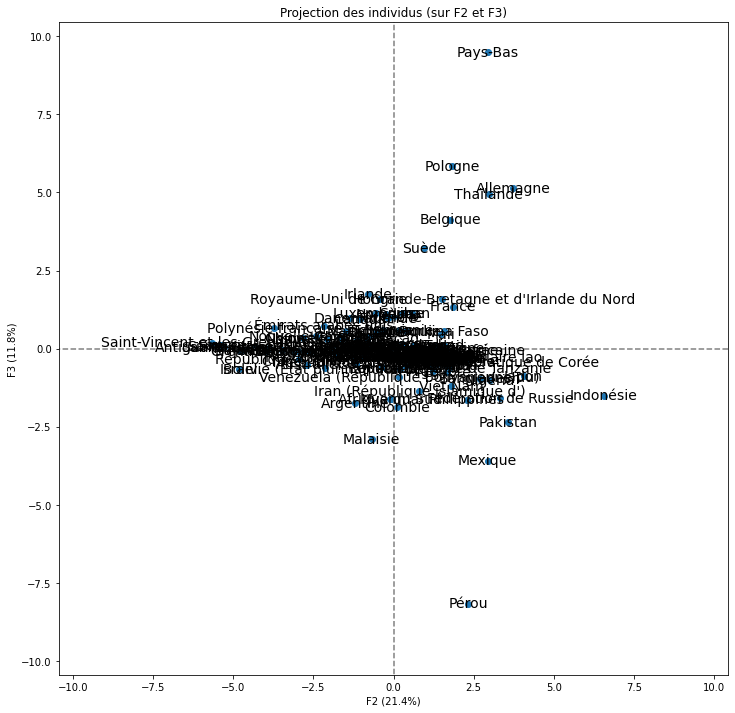

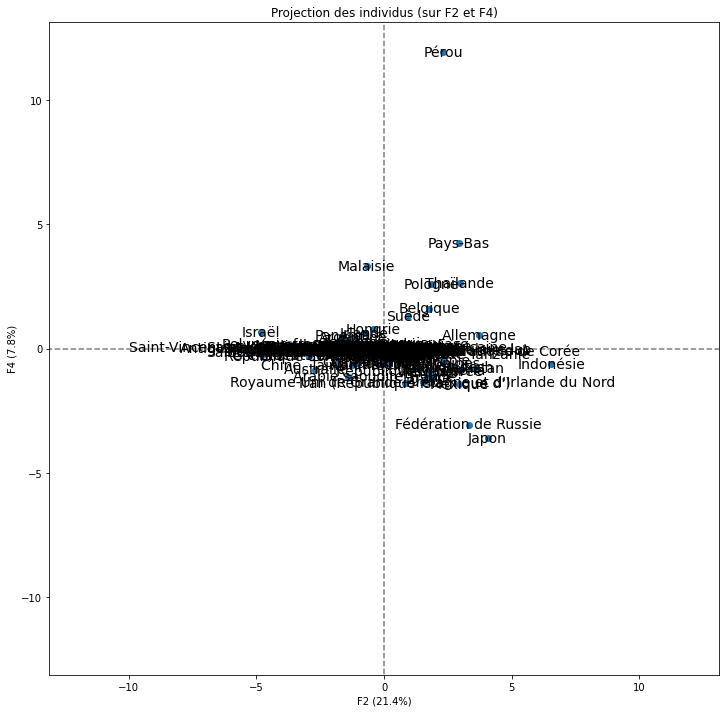

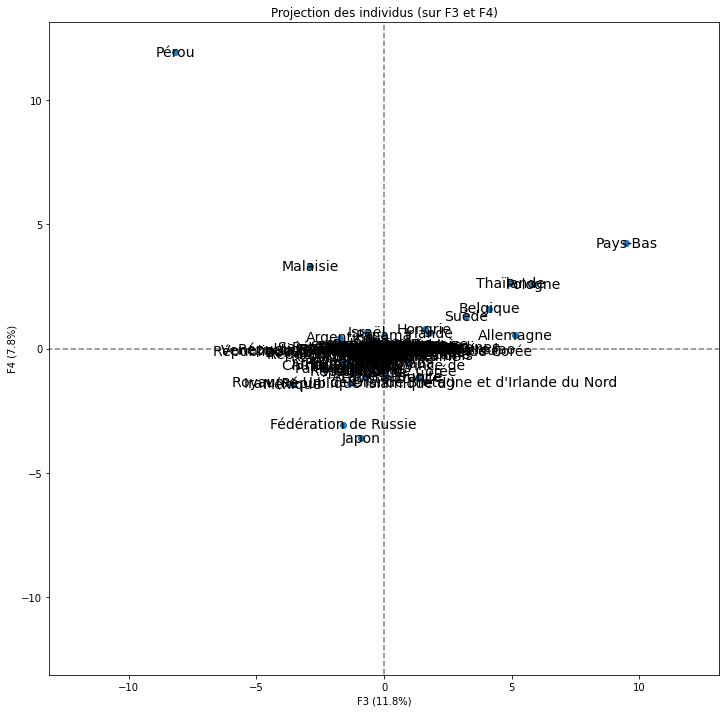

In [22]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)], np.array(name))
#plt.figure(figsize=(12,12))
#plt.show()

## Classification Ascendant Hierarchique (CAH)

In [23]:
X = df.values
y = df.index

In [24]:
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [25]:
Z = linkage(X_scaled, method="ward", metric="euclidean")

> Dendogramme

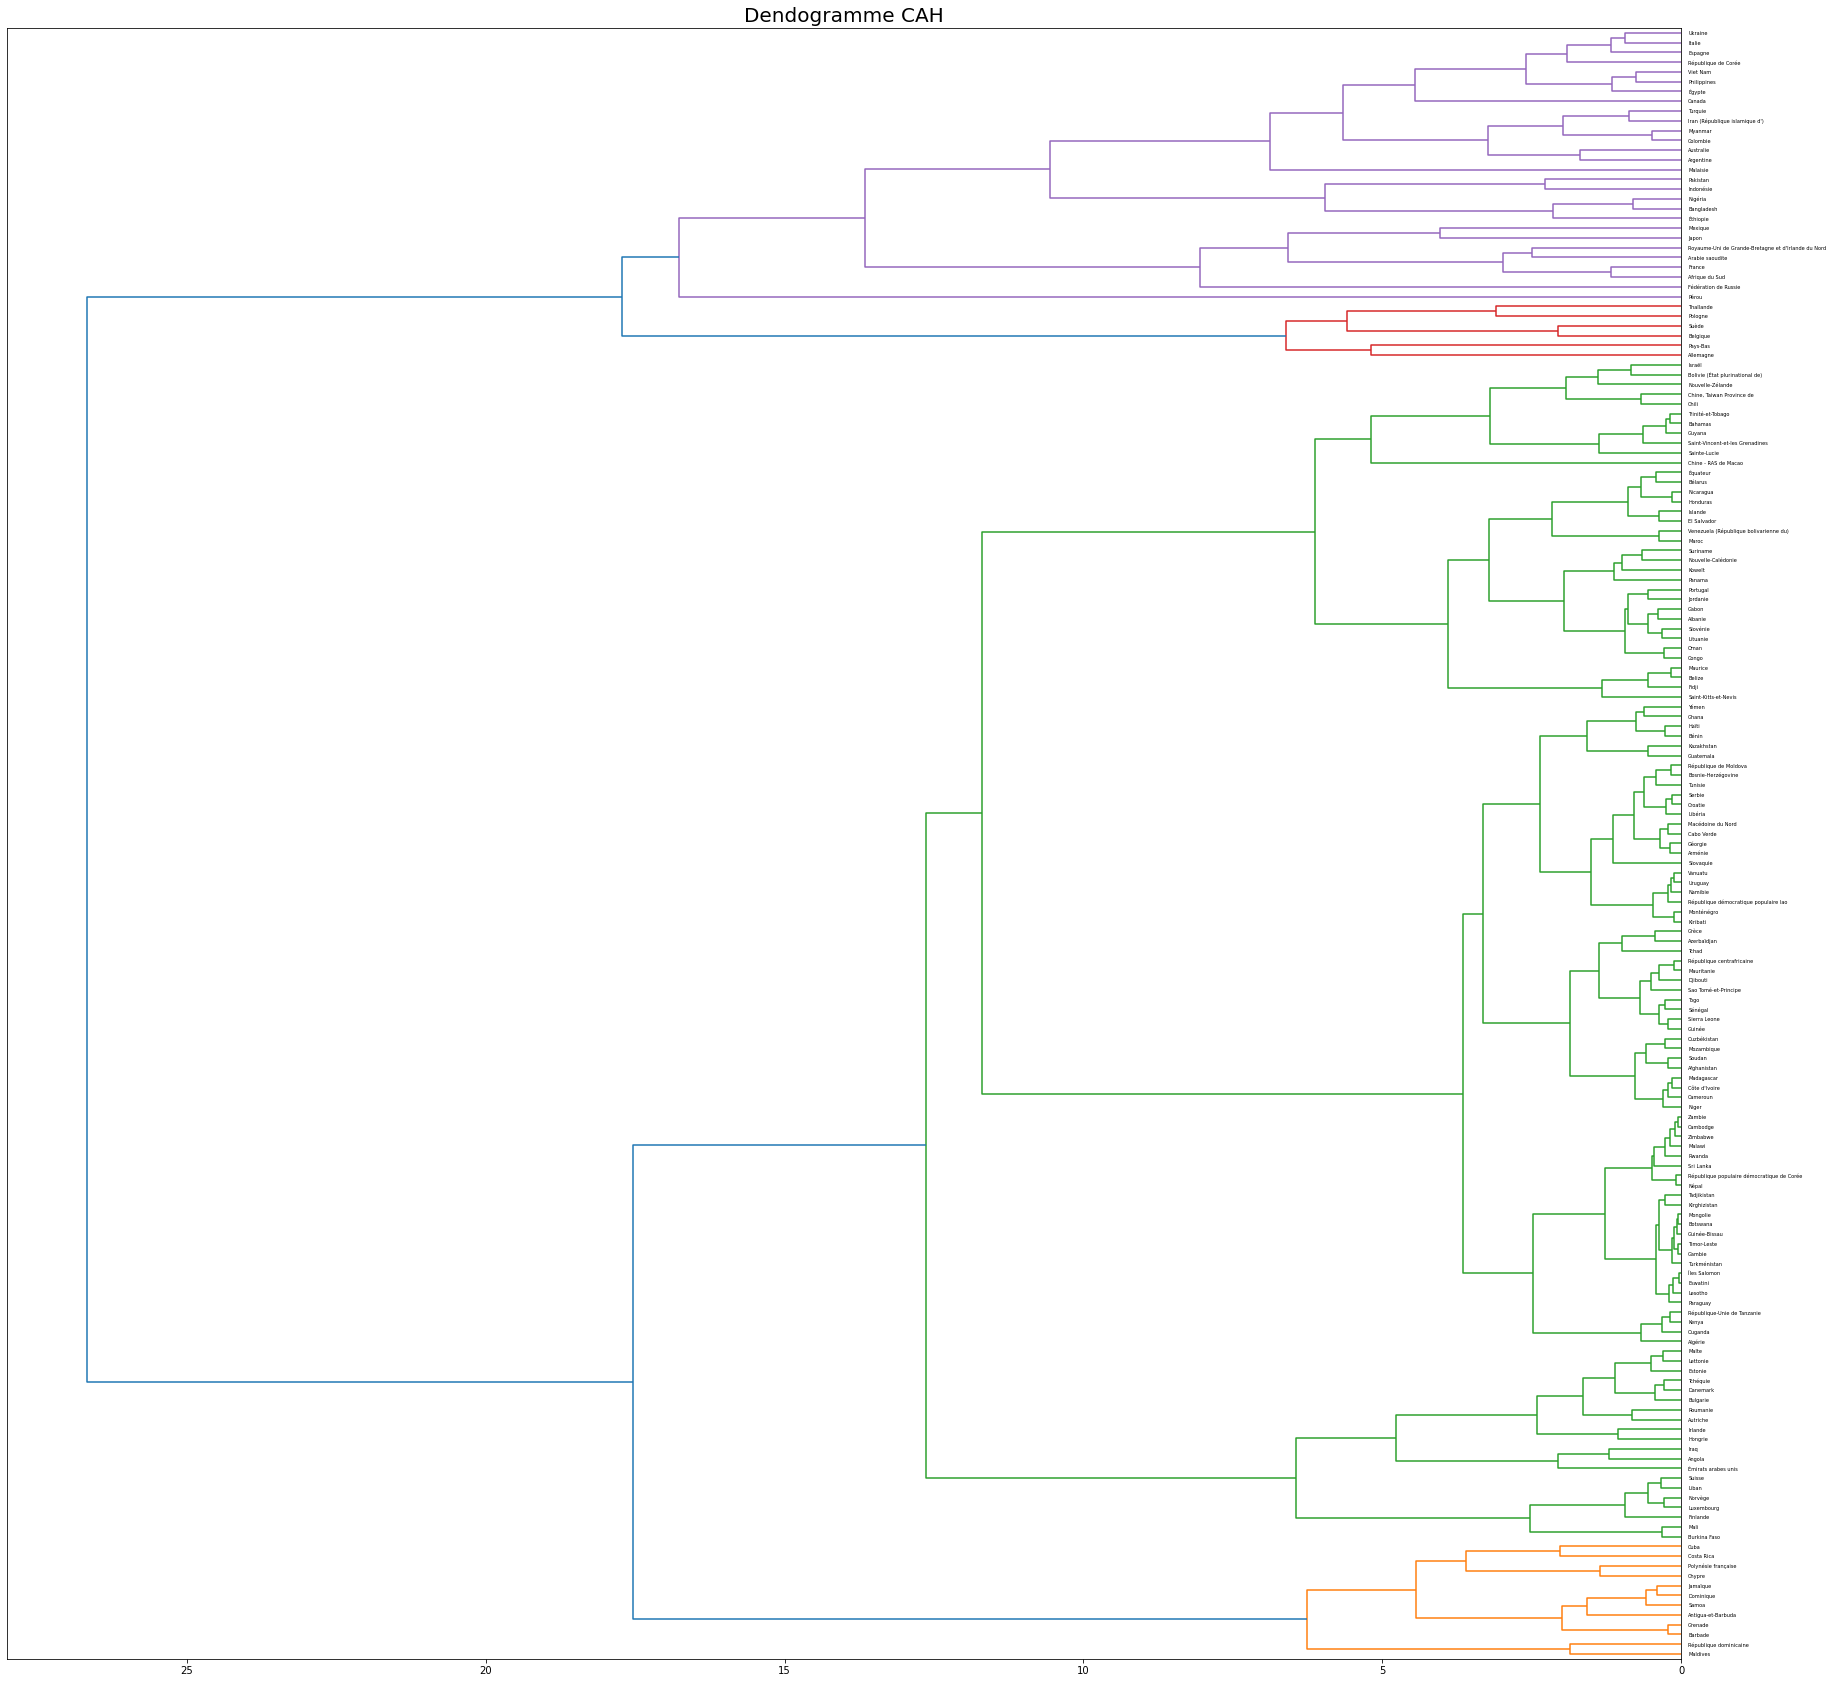

In [26]:
plt.figure(figsize=(30,30))
plt.title("Dendogramme CAH", fontsize=20)
dendrogram(Z, labels=y, orientation="left", color_threshold=17)
plt.savefig("7.png")

In [27]:
clusters = fcluster(Z, 4, criterion='maxclust')


> Clustermap

In [28]:
# Je crée un df pour faire ma clustermap
df_scaled = pd.DataFrame(X_scaled, columns=df.columns.tolist(), index=df.index)
df_cah = df_scaled

In [29]:
# Problème d'attribution df_cah & df_scaled

df_cah["CAH"] = clusters
df["CAH"] = clusters
df_cah = df_cah.groupby("CAH").agg(["mean"])
df_scaled.drop("CAH", axis = 1, inplace=True)
df_cah

Prix export $ par tonnes Population Production (Milliers de tonnes)  \
                        mean       mean                            mean   
CAH                                                                       
1                  -0.333968  -0.546320                       -0.466792   
2                  -0.027433  -0.337636                       -0.400706   
3                   1.651150   0.344603                        1.181957   
4                  -0.092139   1.619362                        1.678400   

    Nourriture (Milliers de tonnes)  \
                               mean   
CAH                                   
1                         -0.426156   
2                         -0.375589   
3                          0.500464   
4                          1.698479   

    Disponibilité de matière grasse en quantité   \
                                            mean   
CAH                                                
1                                       1.370458   
2                                      -0.181481   
3                                      -0.214035   
4                                       0.242783   

    Autres utilisations (non alimentaire) (Milliers de tonnes)  \
                                                          mean   
CAH                                                              
1                                            -0.030673           
2                                            -0.100788           
3                                            -0.126170           
4                                             0.475731           

    Importations - Quantité (Milliers de tonnes) Résidus (Milliers de tonnes)  \
                                            mean                         mean   
CAH                                                                             
1                                      -0.242222                     0.213741   
2                                      -0.239379                     0.176322   
3                                       1.371810                    -4.787736   
4                                       0.844311                     0.172375   

    Aliments pour animaux (Milliers de tonnes)  \
                                          mean   
CAH                                              
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

    Alimentation pour touristes (Milliers de tonnes)  
                                                mean  
CAH                                                   
1                                           3.152686  
2                                          -0.241901  
3                                          -0.251831  
4                                          -0.251831

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1296x1080 with 0 Axes>

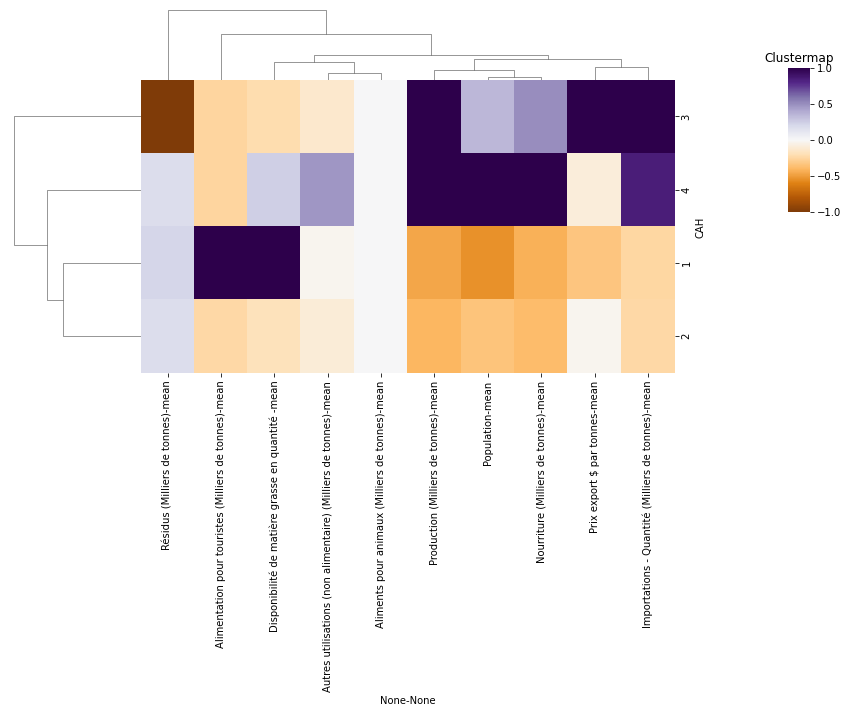

In [30]:
plt.figure(figsize=(18,15))
sns.clustermap(df_cah, cmap="PuOr", linecolor="black", vmin = -1, vmax=1,cbar_pos=(1.1, 0.7 , 0.03, 0.2))
plt.title("Clustermap")
plt.savefig("8.png")
plt.show

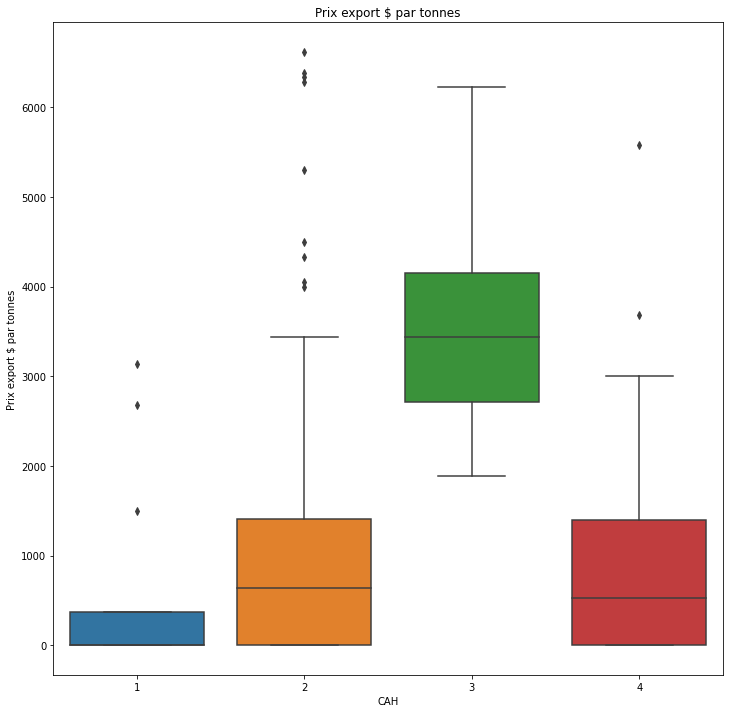

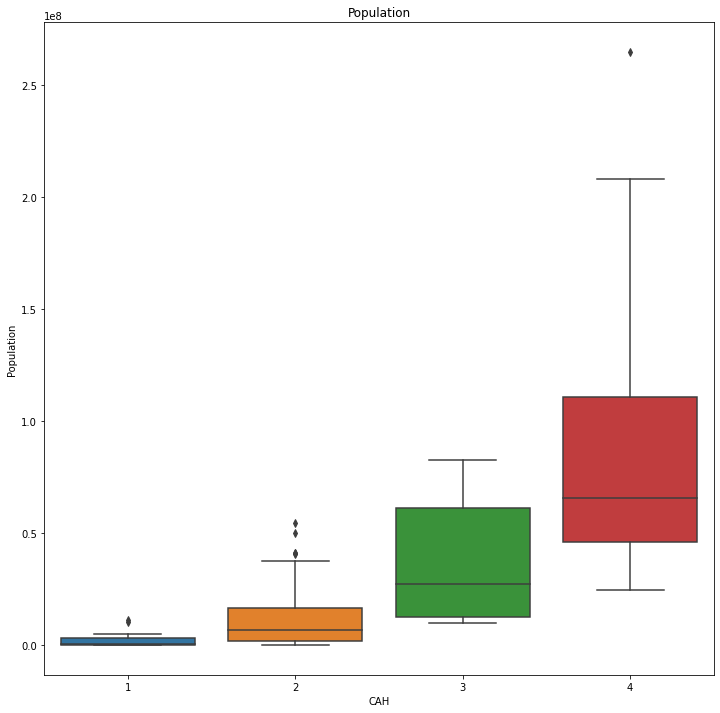

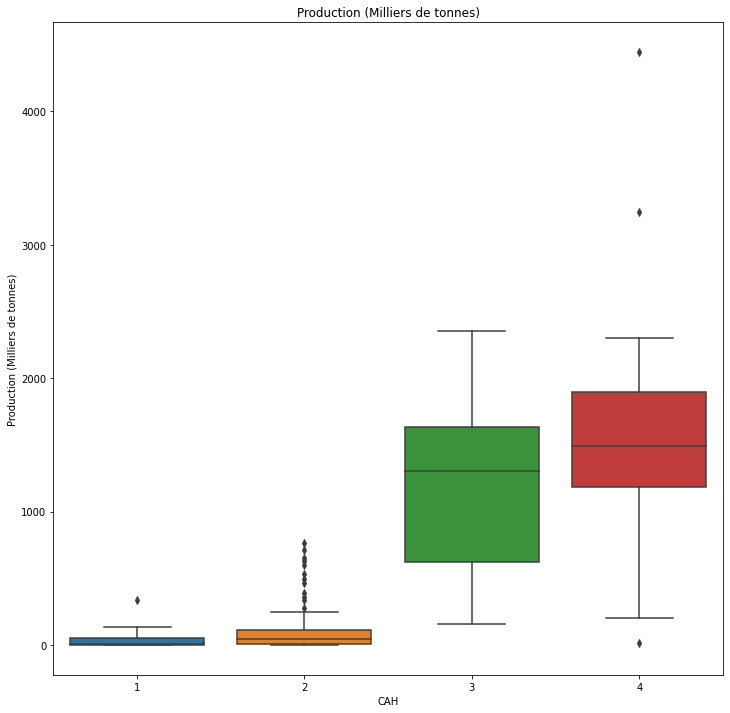

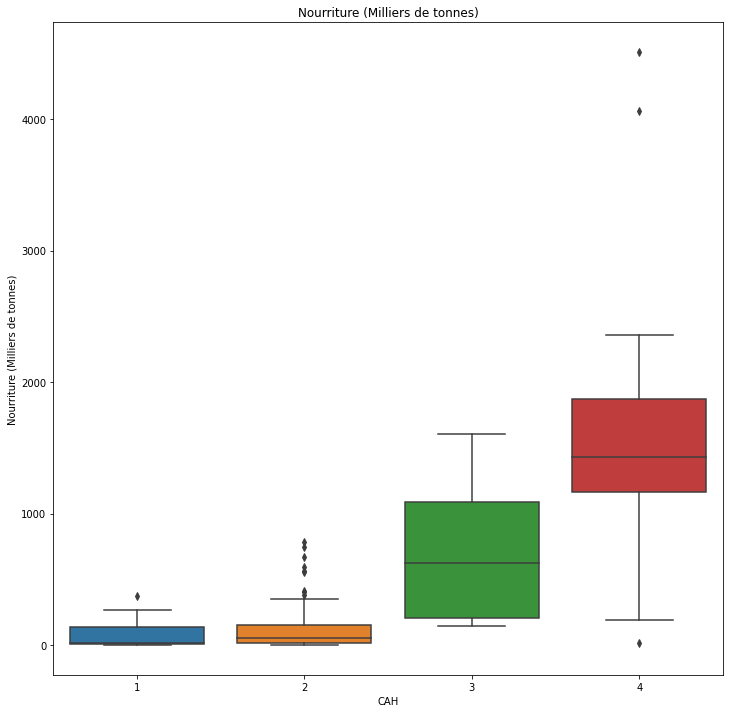

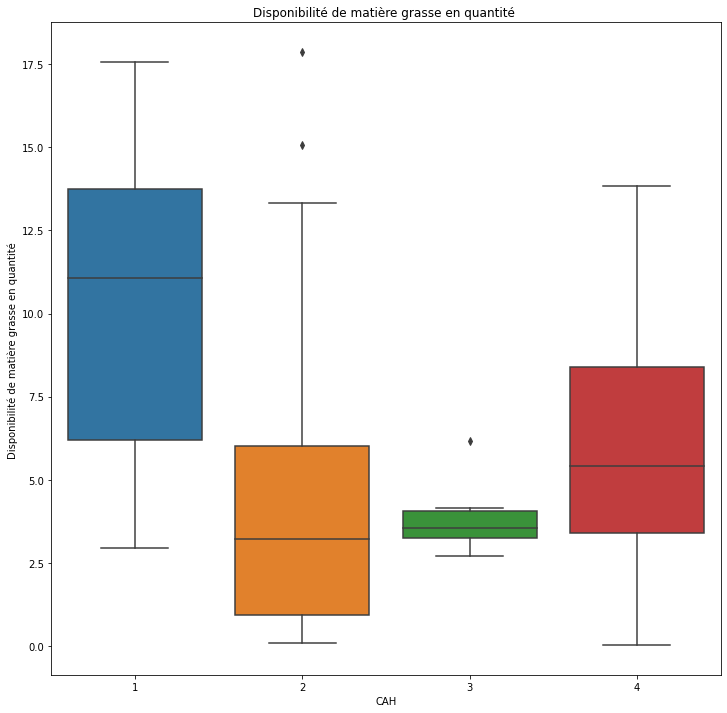

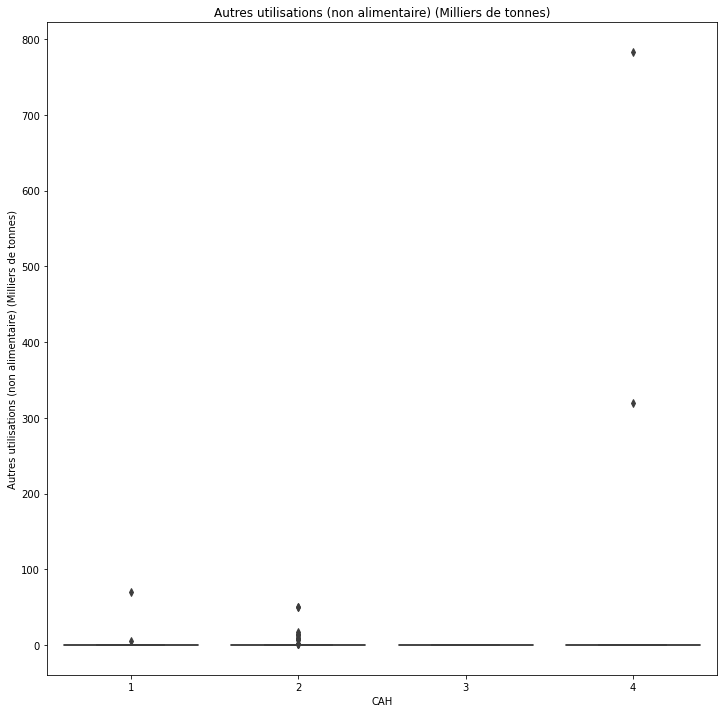

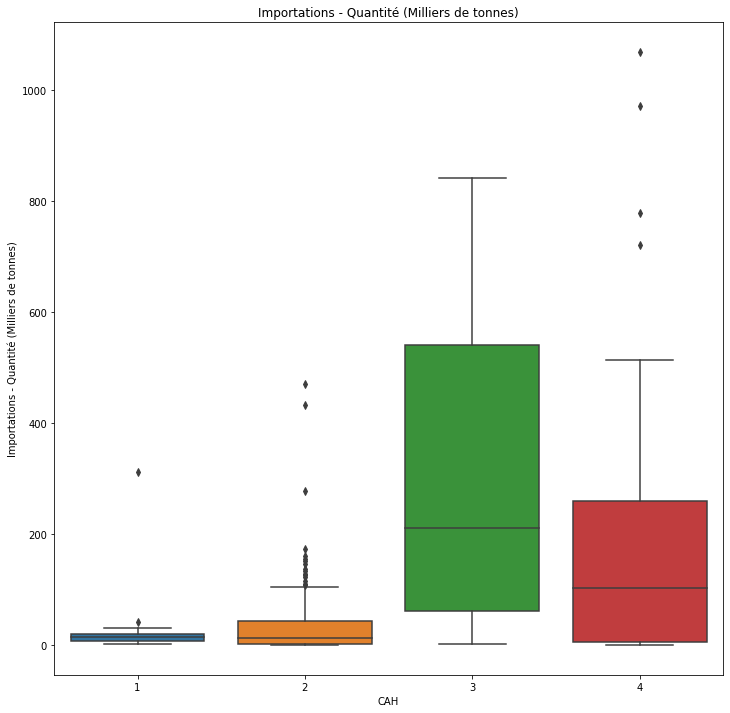

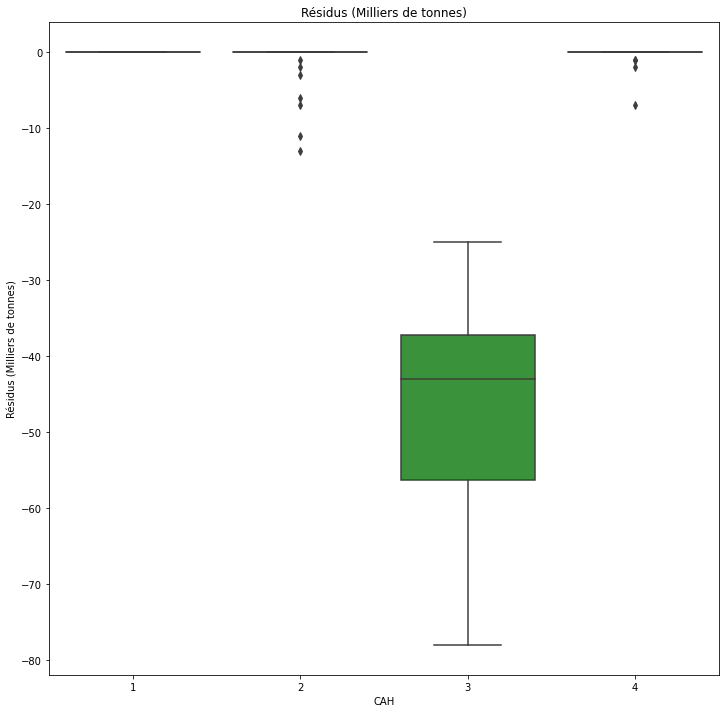

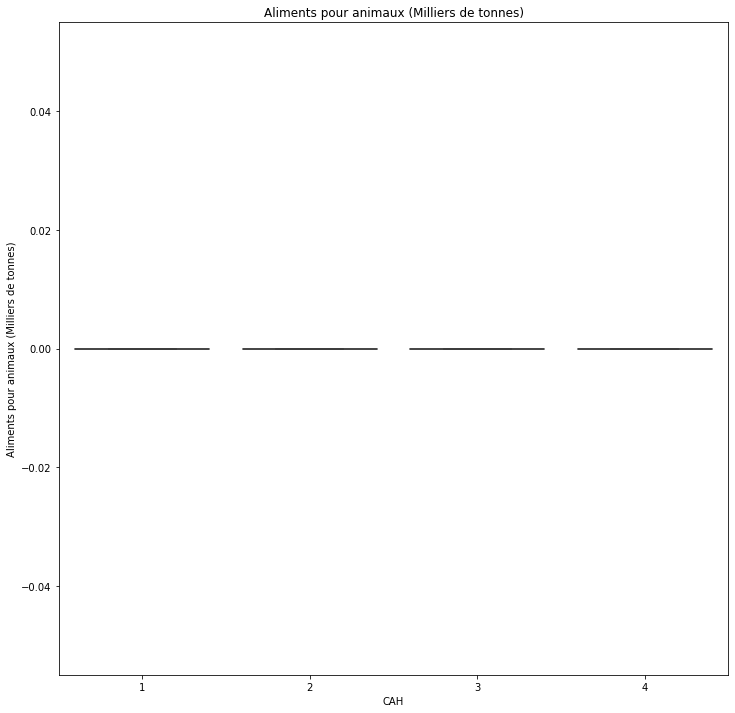

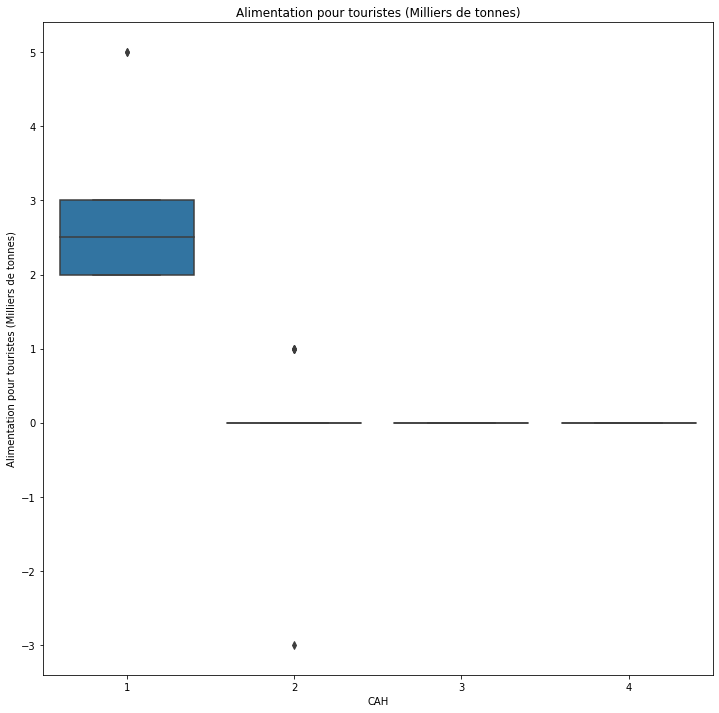

In [31]:
# Algo pour sortir tous mes boxplot

for i in range(len(variance.index.tolist())):
  plt.figure(figsize=(12,12))
  plt.title(variance.index[i])
  sns.boxplot(data=df, x=df.CAH, y=variance.index[i])
  plt.savefig(f'9 {variance.index[i]}.png')
  plt.show()

In [32]:
for idx,column in enumerate(df.columns):
  print(idx,column)

0 Prix export $ par tonnes
1 Population
2 Production (Milliers de tonnes)
3 Nourriture (Milliers de tonnes)
4 Disponibilité de matière grasse en quantité 
5 Autres utilisations (non alimentaire) (Milliers de tonnes)
6 Importations - Quantité (Milliers de tonnes)
7 Résidus (Milliers de tonnes)
8 Aliments pour animaux (Milliers de tonnes)
9 Alimentation pour touristes (Milliers de tonnes)
10 CAH


> **Résultats CAH**

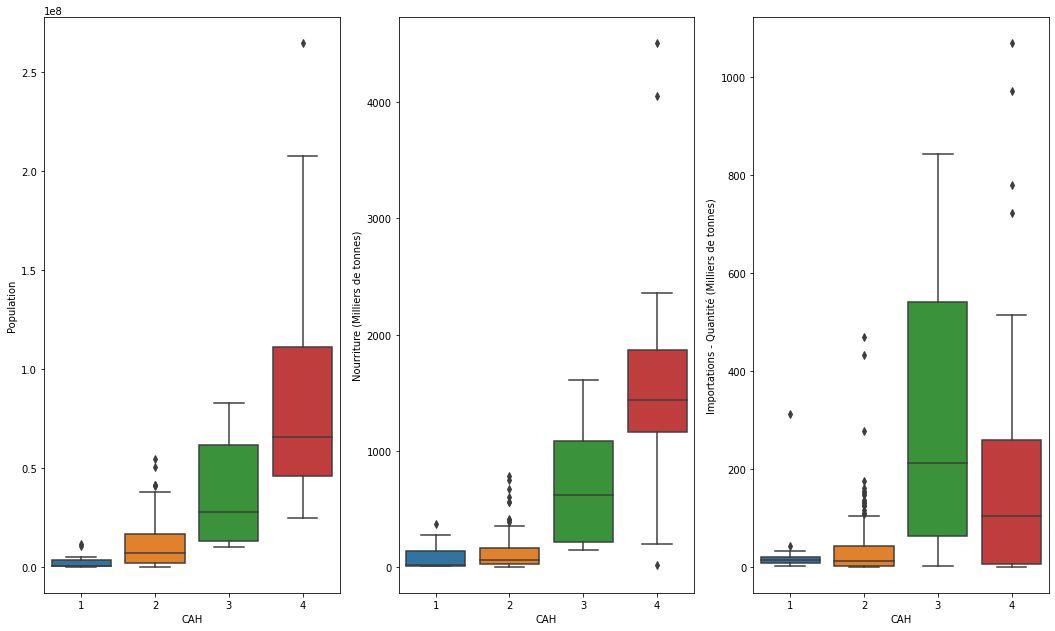

In [33]:
plt.figure(figsize=(18,36))

plt.subplot(331)
sns.boxplot(data=df, x=df.CAH , y=df.columns[1])

plt.subplot(332)
sns.boxplot(data=df, x=df.CAH , y=df.columns[3])

plt.subplot(333)
sns.boxplot(data=df, x=df.CAH , y=df.columns[6])

plt.savefig("10.png")

## KMeans

In [34]:
pca.fit(X_scaled)

cluster = KMeans(n_clusters=n_comp).fit(X_scaled)
cluster_kmeans = cluster.labels_
X_projection = pca.transform(X_scaled)
X_projection

centre = cluster.cluster_centers_
centre_projection = pca.transform(centre)

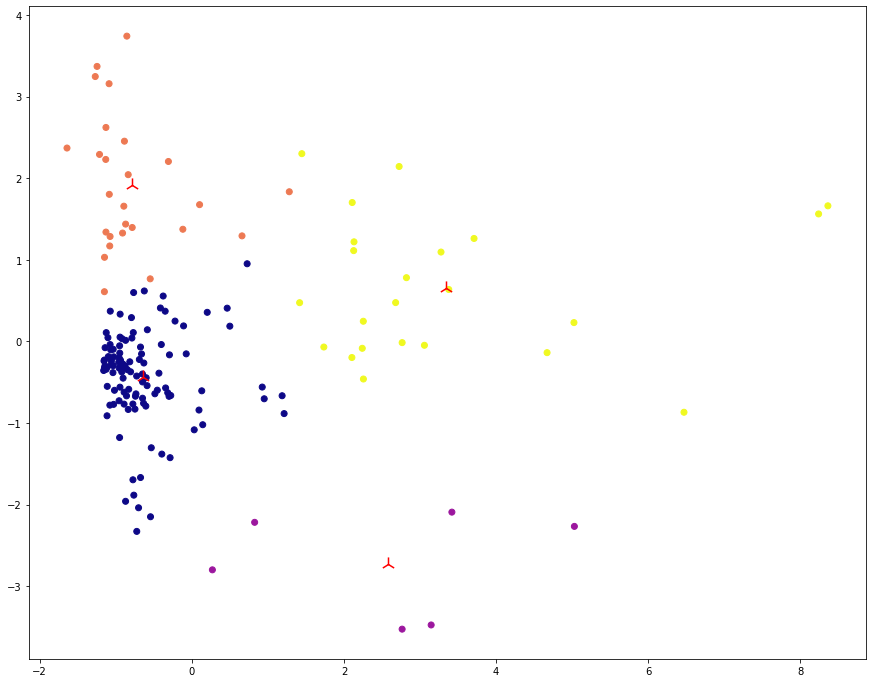

In [35]:
plt.figure(figsize=(15,12))
plt.savefig("11.png")
plt.scatter(X_projection[:,0], X_projection[:,1], c=cluster_kmeans, cmap="plasma")
plt.scatter(centre_projection[:,0], centre_projection[:,1], c="red", marker="2", s=200)

In [36]:
df["KMeans"] = cluster.labels_

In [37]:
df

Prix export $ par tonnes  Population  \
Zone                                                                           
Afghanistan                                          1024.590164    36296113   
Afrique du Sud                                          0.000000    57009756   
Albanie                                              1333.333333     2884169   
Algérie                                                 0.000000    41389189   
Allemagne                                            3359.989429    82658409   
...                                                          ...         ...   
Venezuela (République bolivarienne du)                  0.000000    29402484   
Viet Nam                                              854.409318    94600648   
Yémen                                                1409.023512    27834819   
Zambie                                                  0.000000    16853599   
Zimbabwe                                                0.000000    14236595   

                                        Production (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                        28.0   
Afrique du Sud                                                   1667.0   
Albanie                                                            13.0   
Algérie                                                           275.0   
Allemagne                                                        1514.0   
...                                                                 ...   
Venezuela (République bolivarienne du)                            600.0   
Viet Nam                                                          918.0   
Yémen                                                             168.0   
Zambie                                                             49.0   
Zimbabwe                                                           69.0   

                                        Nourriture (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                        55.0   
Afrique du Sud                                                   2035.0   
Albanie                                                            47.0   
Algérie                                                           264.0   
Allemagne                                                        1609.0   
...                                                                 ...   
Venezuela (République bolivarienne du)                            596.0   
Viet Nam                                                         1166.0   
Yémen                                                             237.0   
Zambie                                                             58.0   
Zimbabwe                                                           67.0   

                                        Disponibilité de matière grasse en quantité   \
Zone                                                                                   
Afghanistan                                                                     0.33   
Afrique du Sud                                                                  9.25   
Albanie                                                                         6.45   
Algérie                                                                         1.50   
Allemagne                                                                       4.16   
...                                                                              ...   
Venezuela (République bolivarienne du)                                          4.39   
Viet Nam                                                                        3.40   
Yémen                                                                           1.85   
Zambie                                                                         

In [38]:
df["KMeans"] = cluster.labels_

In [39]:
# Je crée un df pour faire ma clustermap
df_kmeans = df_scaled
df_kmeans["KMeans"] = cluster.labels_
df_kmeans = df_kmeans.groupby("KMeans").agg(["mean"])

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1296x1080 with 0 Axes>

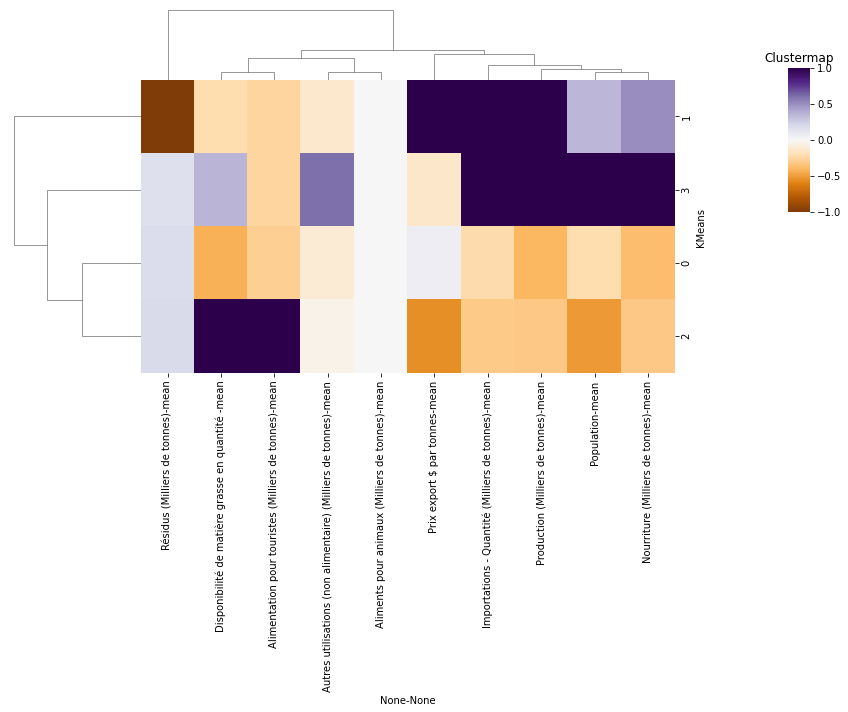

In [40]:
plt.figure(figsize=(18,15))
sns.clustermap(df_kmeans, cmap="PuOr", linecolor="black", vmin = -1, vmax=1,cbar_pos=(1.1, 0.7 , 0.03, 0.2))
plt.title("Clustermap")
plt.savefig("12.png")
plt.show

In [41]:
df_scaled

Prix export $ par tonnes  Population  \
Zone                                                                           
Afghanistan                                            -0.062596    0.300926   
Afrique du Sud                                         -0.733068    0.823340   
Albanie                                                 0.139440   -0.541748   
Algérie                                                -0.733068    0.429378   
Allemagne                                               1.465644    1.470219   
...                                                          ...         ...   
Venezuela (République bolivarienne du)                 -0.733068    0.127064   
Viet Nam                                               -0.173959    1.771411   
Yémen                                                   0.188970    0.087526   
Zambie                                                 -0.733068   -0.189429   
Zimbabwe                                               -0.733068   -0.255431   

                                        Production (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                   -0.506669   
Afrique du Sud                                                 1.834505   
Albanie                                                       -0.528095   
Algérie                                                       -0.153850   
Allemagne                                                      1.615957   
...                                                                 ...   
Venezuela (République bolivarienne du)                         0.310385   
Viet Nam                                                       0.764622   
Yémen                                                         -0.306690   
Zambie                                                        -0.476672   
Zimbabwe                                                      -0.448103   

                                        Nourriture (Milliers de tonnes)  \
Zone                                                                      
Afghanistan                                                   -0.468657   
Afrique du Sud                                                 2.424824   
Albanie                                                       -0.480348   
Algérie                                                       -0.163234   
Allemagne                                                      1.802287   
...                                                                 ...   
Venezuela (République bolivarienne du)                         0.321935   
Viet Nam                                                       1.154907   
Yémen                                                         -0.202691   
Zambie                                                        -0.464273   
Zimbabwe                                                      -0.451121   

                                        Disponibilité de matière grasse en quantité   \
Zone                                                                                   
Afghanistan                                                                -1.098605   
Afrique du Sud                                                              1.114682   
Albanie                                                                     0.419928   
Algérie                                                                    -0.808298   
Allemagne                                                                  -0.148281   
...                                                                              ...   
Venezuela (République bolivarienne du)                                     -0.091212   
Viet Nam                                                                   -0.336857   
Yémen                                                                      -0.721453   
Zambie                                                                     -1.0

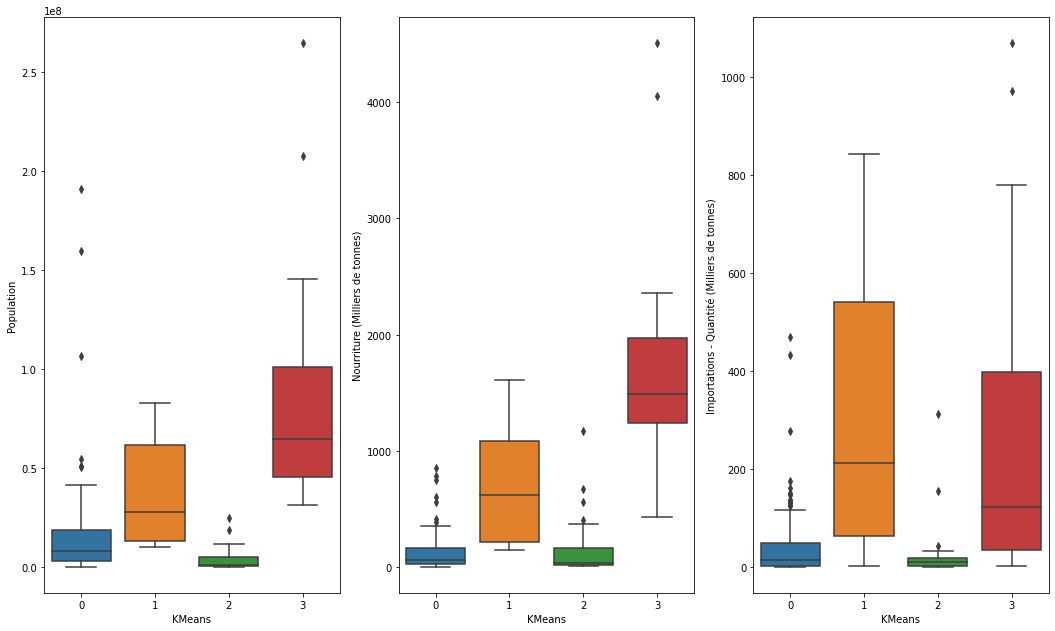

In [42]:
plt.figure(figsize=(18,36))

plt.subplot(331)
sns.boxplot(data=df, x=df.KMeans , y=df.columns[1])

plt.subplot(332)
sns.boxplot(data=df, x=df.KMeans , y=df.columns[3])

plt.subplot(333)
sns.boxplot(data=df, x=df.KMeans , y=df.columns[6])

In [43]:
df_clust_3 = df[df["CAH"]==3]
df_clust_3

Prix export $ par tonnes  Population  \
Zone                                              
Allemagne               3359.989429    82658409   
Belgique                3522.938698    11419748   
Pays-Bas                1891.076847    17021347   
Pologne                 2500.660502    37953180   
Suède                   4363.951473     9904896   
Thaïlande               6222.222222    69209810   

           Production (Milliers de tonnes)  Nourriture (Milliers de tonnes)  \
Zone                                                                          
Allemagne                           1514.0                           1609.0   
Belgique                             463.0                            144.0   
Pays-Bas                            1100.0                            346.0   
Pologne                             2351.0                           1150.0   
Suède                                157.0                            164.0   
Thaïlande                           1676.0                            896.0   

           Disponibilité de matière grasse en quantité   \
Zone                                                      
Allemagne                                          4.16   
Belgique                                           2.71   
Pays-Bas                                           3.74   
Pologne                                            6.18   
Suède                                              3.39   
Thaïlande                                          3.19   

           Autres utilisations (non alimentaire) (Milliers de tonnes)  \
Zone                                                                    
Allemagne                                                0.0            
Belgique                                                 0.0            
Pays-Bas                                                 0.0            
Pologne                                                  0.0            
Suède                                                    0.0            
Thaïlande                                                0.0            

           Importations - Quantité (Milliers de tonnes)  \
Zone                                                      
Allemagne                                         842.0   
Belgique                                          338.0   
Pays-Bas                                          608.0   
Pologne                                            55.0   
Suède                                              84.0   
Thaïlande                                           2.0   

           Résidus (Milliers de tonnes)  \
Zone                                      
Allemagne                         -38.0   
Belgique                          -25.0   
Pays-Bas                          -78.0   
Pologne                           -59.0   
Suède                             -37.0   
Thaïlande                         -48.0   

           Aliments pour animaux (Milliers de tonnes)  \
Zone                                                    
Allemagne                                         0.0   
Belgique                                          0.0   
Pays-Bas                                          0.0   
Pologne                                           0.0   
Suède                                             0.0   
Thaïlande                                         0.0   

           Alimentation pour touristes (Milliers de tonnes)  CAH  KMeans  
Zone                                                                      
Allemagne                                               0.0    3       1  
Belgique                                                0.0    3       1  
Pays-Bas                                                0.0    3       1  
Pologne                                                 0.0    3       1  
Suède                                                   0.0    3       1  
Thaïlande                                               0.0    3       1

In [44]:
df.to_csv("df.csv")